In [7]:
# Import all libraries we need
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
# sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Evaluation Metric
from sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\movies.csv
input\ratings.csv
input\world-happiness-reports-2019.csv


In [8]:
df = pd.read_csv("input/world-happiness-reports-2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


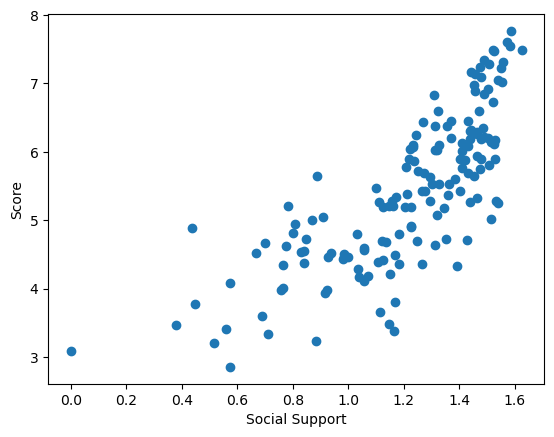

In [10]:
# plot data
plt.scatter(df["Social support"],df["Score"])
plt.xlabel("Social Support")
plt.ylabel("Score")
plt.show()

Linear Regression


In [11]:
# linear regression model
linear_reg = LinearRegression()

x = df["Social support"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

linear_reg.fit(x,y)

LinearRegression()

In [12]:
LinearRegression()

LinearRegression()

Prediction

In [13]:
Predicted_Score1 = linear_reg.predict([[1.5]])
print("Predicted Score 1: ",Predicted_Score1)

Predicted_Score2 = linear_reg.predict([[0.5]])
print("Predicted Score 2: ",Predicted_Score2)

Predicted_Score3 = linear_reg.predict([[1.8]])
print("Predicted Score 3: ",Predicted_Score3)

intercept = linear_reg.intercept_
print("intercept: ",intercept)   # y eksenini kestigi nokta intercept

slope = linear_reg.coef_
print("slope: ",slope)   # egim slope

# Score = 1.91243024 + 2.89098704*Social Support 

Predicted Score 1:  [[6.24891081]]
Predicted Score 2:  [[3.35792377]]
Predicted Score 3:  [[7.11620692]]
intercept:  [1.91243024]
slope:  [[2.89098704]]


Visualization

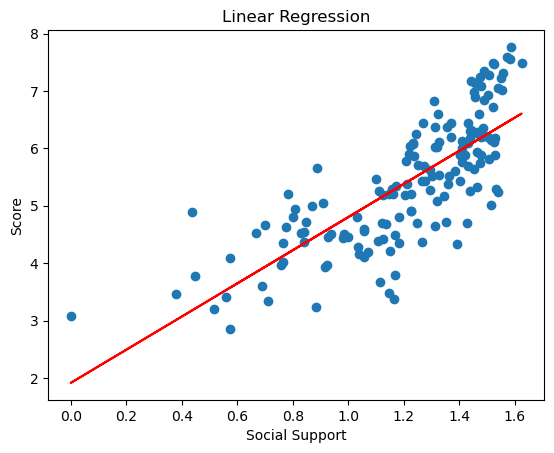

r_score:  0.6038188059907055


In [14]:
y_predicted = linear_reg.predict(x)
plt.scatter(x,y)
plt.plot(x, y_predicted,color = "red")
plt.xlabel("Social Support")
plt.ylabel("Score")
plt.title("Linear Regression")
plt.show()
print("r_score: ", r2_score(y,y_predicted))

Multiple Linear Regression


In [15]:
# Multiple Linear Regression Model
x = df.iloc[:,3:].values
y = df["Score"].values.reshape(-1,1)
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)

LinearRegression()

Prediction

In [17]:
print("Intercept: ", multiple_linear_regression.intercept_)
print("b1,b2,b3,b4,b5,b6: ",multiple_linear_regression.coef_)

Intercept:  [1.79522023]
b1,b2,b3,b4,b5,b6:  [[0.77537163 1.12419158 1.07814273 1.45483237 0.48978335 0.97228022]]


In [18]:
# prediction
multiple_linear_regression.predict(np.array([[1.340,1.587,0.986,0.596,0.153,0.393]]))

array([[7.00548205]])

Polynomial Regression


In [19]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


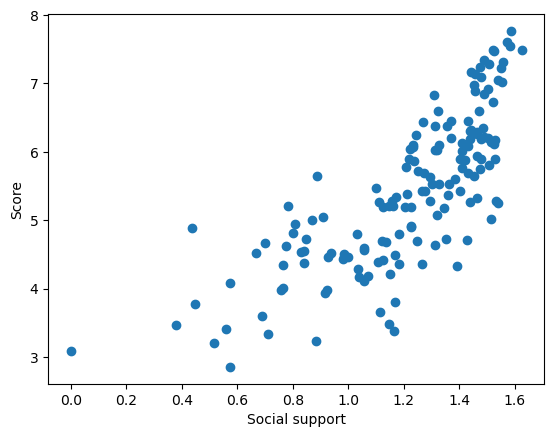

In [20]:
# plot data
plt.scatter(df["Social support"],df["Score"])
plt.xlabel("Social support")
plt.ylabel("Score")
plt.show()

In [21]:
x = df["Healthy life expectancy"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

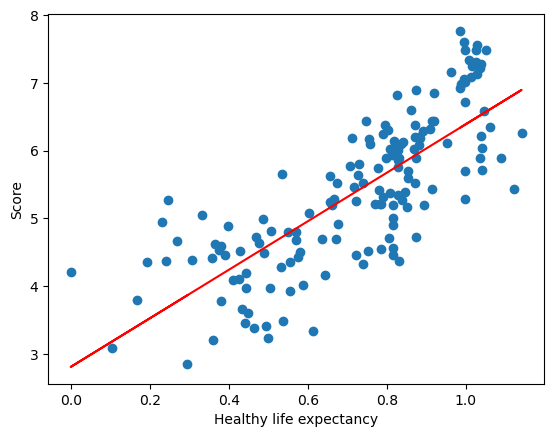

In [22]:
lr = LinearRegression()
lr.fit(x,y)
y_head = lr.predict(x)
plt.scatter(df["Healthy life expectancy"],df["Score"])
plt.xlabel("Healthy life expectancy")
plt.ylabel("Score")
plt.plot(x,y_head,color="red",label ="linear")
plt.show()

In [23]:
polynomial_regression = PolynomialFeatures(degree = 2)
x_polynomial = polynomial_regression.fit_transform(x)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

LinearRegression()

Visualization


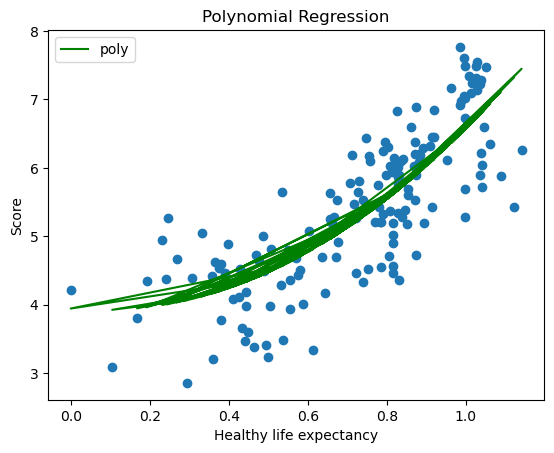

r_square score:  0.6435170480772359


In [24]:
y_head2 = linear_regression2.predict(x_polynomial)
plt.scatter(df["Healthy life expectancy"],df["Score"])
plt.xlabel("Healthy life expectancy")
plt.ylabel("Score")
plt.plot(x,y_head2,color= "green",label = "poly")
plt.title("Polynomial Regression")
plt.legend()
plt.show()
print("r_square score: ", r2_score(y,y_head2))

Decision Tree


In [25]:
x = df["GDP per capita"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

In [26]:

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)
tree_reg.predict([[1.2]])
x_ = np.arange(min(x),max(x),0.1).reshape(-1,1)
y_head = tree_reg.predict(x_)

C:\Users\Taner\AppData\Local\Temp\ipykernel_10748\1129513960.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_ = np.arange(min(x),max(x),0.1).reshape(-1,1)


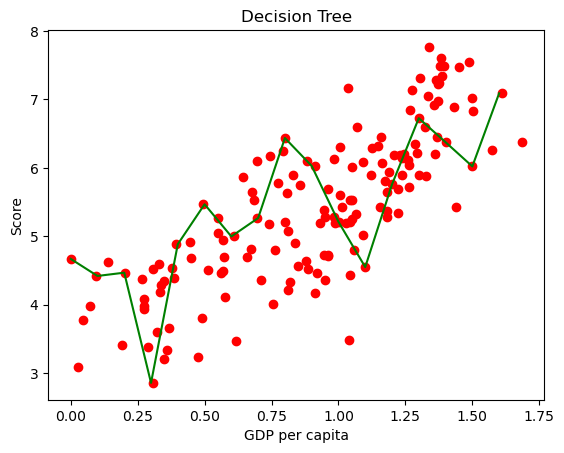

In [27]:
# visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color = "green")
plt.xlabel("GDP per capita")
plt.ylabel("Score")
plt.title("Decision Tree")
plt.show()

Random Forest


In [28]:
x = df["Freedom to make life choices"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

In [29]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x,y)
print("Predicted Value = : ",rf.predict([[0.5]]))
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = rf.predict(x_)

c:\Users\Taner\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Taner\AppData\Local\Temp\ipykernel_10748\3096934044.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)


Predicted Value = :  [5.40538138]


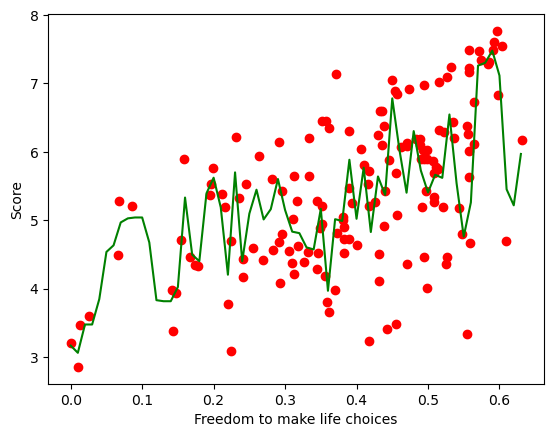

In [30]:
# visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Score")
plt.show()